# Assignment 0B

### Problem 1.A

In [2]:
import numpy as np

def quadratic_roots(a: float, b: float, c: float):
    assert a != 0
    real = -b/(2*a)
    radical = np.sqrt(b**2 - 4*a*c)/(2*a)
    return real + radical, real - radical

A=0.001
B=1000
C=0.001

r1, r2 = quadratic_roots(A, B, C)
print(f"Root 1 is x={float(r1)}\nRoot 2 is x={float(r2)}")

Root 1 is x=-1.00000761449337e-06
Root 2 is x=-999999.999999


### Problem 1.B

In [3]:
import numpy as np

def quadratic_roots(a: float, b: float, c: float):
    radical = np.sqrt(b**2 - 4*a*c)
    assert radical - b != 0
    return (2*c)/(-b - radical), (2*c)/(-b + radical)

A=0.001
B=1000
C=0.001

r1, r2 = quadratic_roots(A, B, C)
print(f"Root 1 is x={float(r1)}\nRoot 2 is x={float(r2)}")

Root 1 is x=-1.000000000001e-06
Root 2 is x=-1000010.5755125057


Because of floating point arithmethic, both roots give approximately equal, but the calculation guess comes from different sides for the approach toward the root.

The radicand is in the numerator, then the denominator, and so how they calculate 1/x could introduce a change in the value because of approximations in 64-bit floating points.

### Problem 2.A

Write a program that has $f(x)=x(x-1)$ and calculates the derivative at $x=1$, using:
$$\dfrac{df}{dx}=\lim_{\delta\rightarrow0}\dfrac{f(x+\delta)-f(x)}{\delta}$$
Use $\delta=10^{-2}$ compare it to the analytically.

In [5]:
def numerical_derivative(f, x: float, h: float):
    assert(h != 0)
    return (f(x+h)-f(x))/h

def f(x: float): return x*(x-1)

X = 1
delta = 1e-2
result = numerical_derivative(f, x=X, h=delta)
print(f"The derivative at x={X} is {result}")

The derivative at x=1 is 1.010000000000001


The two results don't agree exactly ($f'(1)=1$) since there is a slight change in the height that is non-linear over our small interval $\delta$. It is, however, a good approximation.

### Problem 2.B

Repeat for different deltas

In [6]:
def numerical_derivative(f, x: float, h: float):
    assert(h != 0)
    return (f(x+h)-f(x))/h

def f(x: float): return x*(x-1)

X = 1
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
for delta in deltas:
    result = numerical_derivative(f, x=X, h=delta)
    print(f"The derivative at x={X} is {result} at delta={delta}")

The derivative at x=1 is 1.010000000000001 at delta=0.01
The derivative at x=1 is 1.0000999999998899 at delta=0.0001
The derivative at x=1 is 1.0000009999177333 at delta=1e-06
The derivative at x=1 is 1.0000000039225287 at delta=1e-08
The derivative at x=1 is 1.000000082840371 at delta=1e-10
The derivative at x=1 is 1.0000889005833413 at delta=1e-12
The derivative at x=1 is 0.9992007221626509 at delta=1e-14


The derivative at x=1 is 1.010000000000001 at delta=0.01

The derivative at x=1 is 1.0000999999998899 at delta=0.0001

The derivative at x=1 is 1.0000009999177333 at delta=1e-06

The derivative at x=1 is 1.0000000039225287 at delta=1e-08

The derivative at x=1 is 1.000000082840371 at delta=1e-10

The derivative at x=1 is 1.0000889005833413 at delta=1e-12

The derivative at x=1 is 0.9992007221626509 at delta=1e-14

With small numbers, there becomes a point where the floating point operations has compounding errors, and for our case it looks to be somewhere around $10^{-14}$. I could give a whole lecture on floating point arithmetic and errors since my capstone is largly about precision and accuracy when numbers get stupid big and stupid small.

### Problem 3

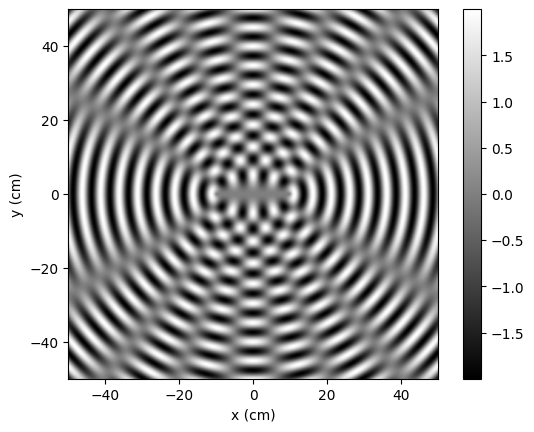

In [10]:
import numpy as np

# Constants
LAMBDA = 5     # cm
AMPLITUDE = 1  # cm
DISTANCE = 20  # cm
RESOLUTION = 500  # points

# Variables
X1, Y1 = -DISTANCE/2, 0
X2, Y2 = +DISTANCE/2, 0

# Define the wave function
def wave(k, x, y, cx, cy):
    return np.sin(k * np.sqrt((x - cx)**2 + (y - cy)**2))

# Define the grid
X = np.linspace(-50, 50, RESOLUTION)
Y = np.linspace(-50, 50, RESOLUTION)
X, Y = np.meshgrid(X, Y)

# Calculate the wave
Z1 = wave(2*np.pi/LAMBDA, X, Y, X1, Y1)
Z2 = wave(2*np.pi/LAMBDA, X, Y, X2, Y2)
Z = AMPLITUDE * (Z1 + Z2)

# Do a density plot
import matplotlib.pyplot as plt
plt.imshow(Z, extent=(-50, 50, -50, 50))
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.colorbar()
plt.show()
